In [1]:
import pandas as pd
import os

Merge 12 months of data into a single file

In [26]:
df = pd.read_csv(r"C:\Users\hafil\OneDrive\Documents\DA\Python\Sales_Analysis\Sales_April_2019.csv")

files=[file for file in os.listdir(r"C:\Users\hafil\OneDrive\Documents\DA\Python\Sales_Analysis")]

all_months_data= pd.DataFrame()

for file in files:
    df = pd.read_csv(r"C:\Users\hafil\OneDrive\Documents\DA\Python\Sales_Analysis\\"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [29]:
all_months_data.to_csv('all_month_data.csv',index=False)

Read in updataed dataframe

In [33]:
all_data = pd.read_csv(r"C:\Users\hafil\all_month_data.csv")

In [34]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Clean up the Data

Drop the NAN

In [44]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data=all_data.dropna(how='all')

Find Or and delete it

In [47]:
all_data = all_data[all_data['Order Date'].str[0:2] !='Or']

Convert Columns to the correct type

In [52]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']= pd.to_numeric(all_data['Price Each'])

Augumented data with additional columns

Adding Month Column

In [48]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month']= all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Adding a Sales column

In [54]:
all_data['Sales'] =all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,11.99


Add a City column

In [87]:
# lets use the .apply() method
#all_data = all_data.drop(['City'], axis=1)

#x here specifies each of the cell content and it uses it to aplly a arbitary funtion on an entire column
#you can also create a funtion and add it instead of the split function

#all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

#all_data['State'] = all_data['Purchase Address'].apply(lambda x: get_city(x)+ ' ('+ get_state(x)+')')

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({(get_state(x))})" )


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,Sales,State,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,23.90,Dallas (TX),Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,99.99,Boston (MA),Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,600.00,Los Angeles (CA),Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.99,Los Angeles (CA),Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,11.99,Los Angeles (CA),Los Angeles (CA)


In [85]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,Sales,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,11.99,Los Angeles (CA)


In [86]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,Sales,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,11.99,Los Angeles (CA)


# Question1: Best Month for sales and how much was earned that month

In [59]:
results = all_data.groupby('Month').sum()

C:\Users\hafil\AppData\Local\Temp\ipykernel_29460\675579350.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


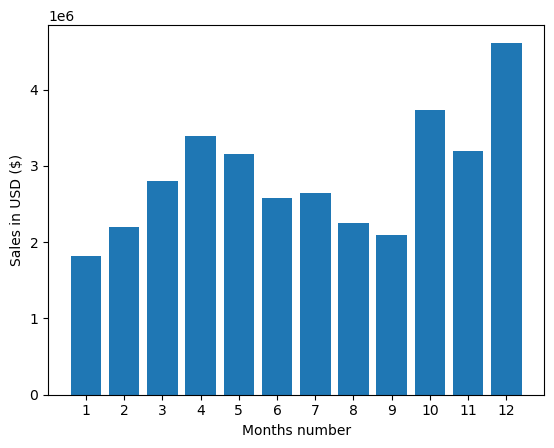

In [63]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel('Months number')
plt.ylabel('Sales in USD ($)')
plt.show()

This graph shows most of the products are ordered in the month of December as 
there are holidays like Chrismas and NewYears are highly gift giving seasons

# Question 2: What city has the hightest Sales in the US

In [64]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,11.99


In [88]:
results = all_data.groupby('City').sum()
results

C:\Users\hafil\AppData\Local\Temp\ipykernel_29460\2386508471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Revenue,Sales
City,,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43,4664317.43
Portland (ME),2750,447189.25,17144,449758.27,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91,8262203.91


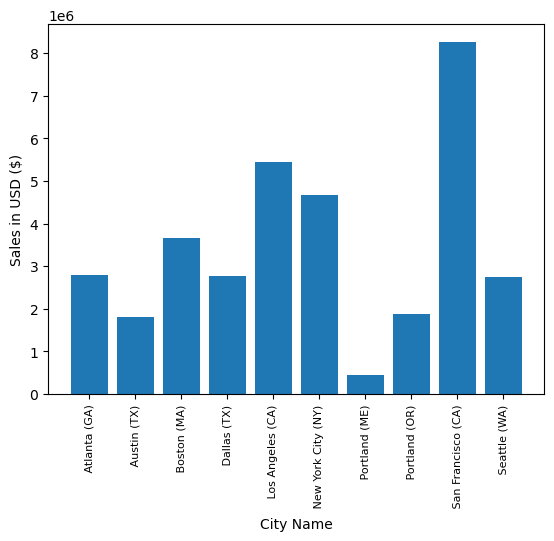

In [96]:
import matplotlib.pyplot as plt

cities= [city for city, df in all_data.groupby('City')]#list comprehension to order cities in the same order in the groupby statement

plt.bar(cities,results['Sales'])
plt.xticks(cities, rotation='vertical',size=8)
plt.xlabel('City Name')
plt.ylabel('Sales in USD ($)')
plt.show()

This graphs shows that San Fransisco(CA) has the most Sales in USD 

# Question 3: What time should we display advertistments to maximize likehood of customers buying product?

In [98]:
all_data.head()
#convert order date to a date_time library using python

all_data['Order Date'] =pd.to_datetime(all_data['Order Date'])

In [99]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,Sales,State,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,23.90,Dallas (TX),Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,99.99,Boston (MA),Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,600.00,Los Angeles (CA),Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.99,Los Angeles (CA),Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,11.99,Los Angeles (CA),Los Angeles (CA)


Creating new Column 'Hour' and Minute

In [103]:
all_data['Hour']= all_data['Order Date'].dt.hour
all_data['Minute']= all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,Sales,State,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,23.90,Dallas (TX),Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,99.99,Boston (MA),Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,600.00,Los Angeles (CA),Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.99,Los Angeles (CA),Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,11.99,Los Angeles (CA),Los Angeles (CA),9,27


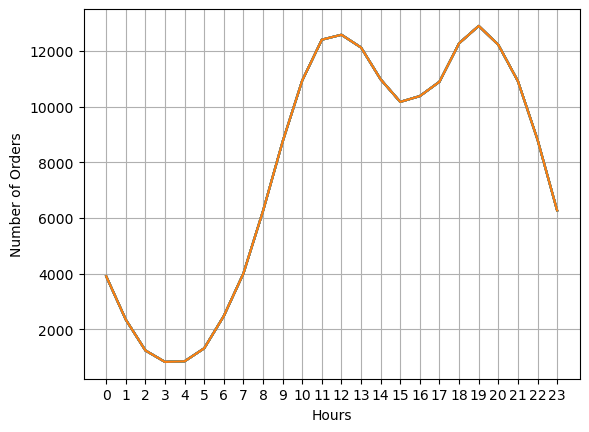

In [109]:
hours= [hour for hour, df in all_data.groupby('Hour')]#list comprehension to order hours in the same order in the groupby statement


plt.plot(hours, all_data.groupby('Hour').count())

all_data.groupby('Hour').count()
plt.grid()
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.show()

This graph shows that around 11 amd and 7 pm most of the purchases are made so a 
advertisment between 10:00 -12:00 and 18:00-20:00 will be helpful to improve purchases

# Question 4 : What products are most often sold together?

In [110]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,Sales,State,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,23.90,Dallas (TX),Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,99.99,Boston (MA),Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,600.00,Los Angeles (CA),Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.99,Los Angeles (CA),Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,11.99,Los Angeles (CA),Los Angeles (CA),9,27


In [114]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

df= df[['Order ID','Grouped']].drop_duplicates()

df

C:\Users\hafil\AppData\Local\Temp\ipykernel_29460\3939318659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [118]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
#count.most_common(10)

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# Question 5: What product sold most and why?

C:\Users\hafil\AppData\Local\Temp\ipykernel_29460\1752728435.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered= product_group.sum()['Quantity Ordered']


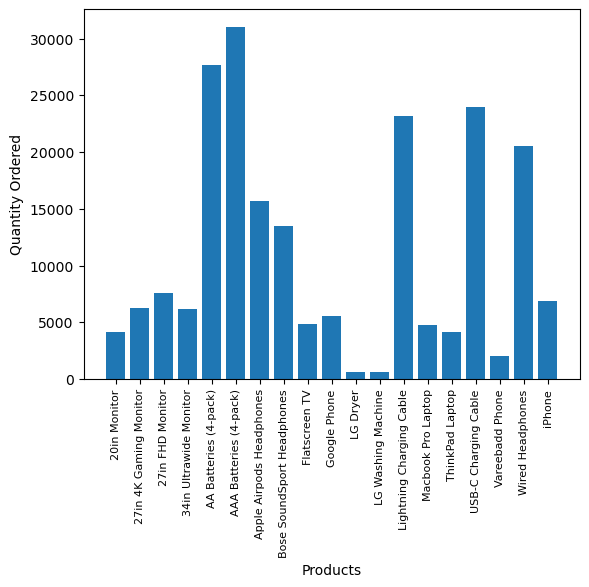

In [124]:
all_data.head()


product_group= all_data.groupby(['Product'])

quantity_ordered= product_group.sum()['Quantity Ordered']

products= [product for product, df in all_data.groupby('Product')]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical',size=8)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()


In [128]:
prices =all_data.groupby('Product').mean()['Price Each']

C:\Users\hafil\AppData\Local\Temp\ipykernel_29460\3318856699.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices =all_data.groupby('Product').mean()['Price Each']


In [129]:
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\hafil\AppData\Local\Temp\ipykernel_29460\1712933924.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical',size=8)


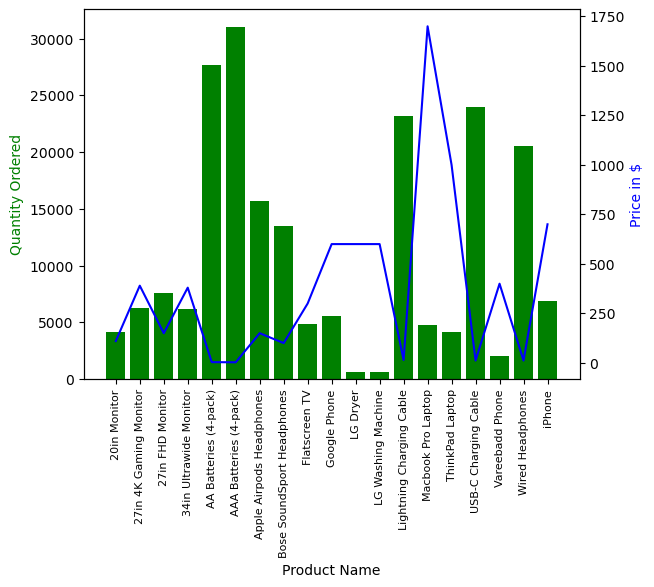

In [137]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered,color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price in $', color='b')
ax1.set_xticklabels(products, rotation='vertical',size=8)

plt.show()

This graph shows the most ordered products are usually low in price in expection to the laptops
as they are a staple now a days in many households